## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].count()
number_of_mice

1893

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mice = merged_data.drop_duplicates(["Mouse ID","Timepoint"])
unique_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = unique_mice["Mouse ID"].count()
number_of_mice

1888

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
mean_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_statistics = pd.DataFrame({"Mean" : mean_tumor,
                                "Median" : median_tumor,
                                "Variance" : variance_tumor,
                                "Stxandard Deviation" : stdev_tumor,
                                 "SEM" : sem_tumor})

regimen_statistics

,Mean,Median,Variance,Stxandard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
simple_summary = unique_mice.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method produces everything in a single groupby function
simple_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

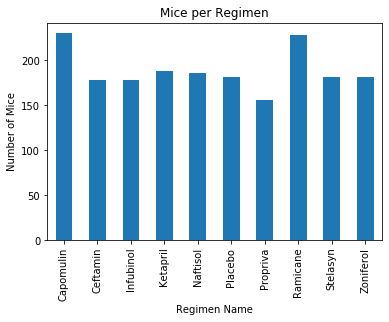

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_regimen = unique_mice.groupby(["Drug Regimen"])["Mouse ID"].count()
mice_per_regimen.plot(kind='bar', x="Drug Regimen", y=mice_per_regimen)
plt.xlabel("Regimen Name")
plt.ylabel("Number of Mice")
plt.title("Mice per Regimen")
mice_per_regimen

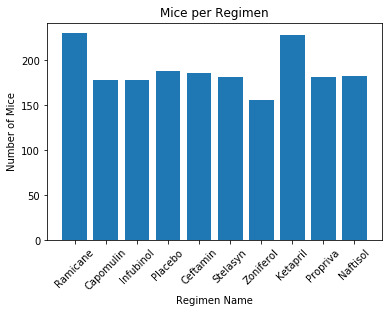

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = unique_mice.groupby(["Drug Regimen"])["Mouse ID"].count()
x_axis = unique_mice["Drug Regimen"].unique()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.xlabel("Regimen Name")
plt.ylabel("Number of Mice")
plt.title("Mice per Regimen")
plt.show()

Sex
Female    930
Male      958
Name: Sex, dtype: int64

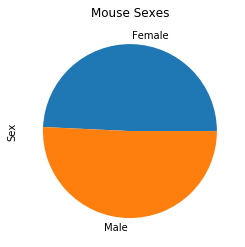

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sexes = unique_mice.groupby(["Sex"])["Sex"].count()
mouse_sexes.plot(kind='pie')
plt.title("Mouse Sexes")
mouse_sexes

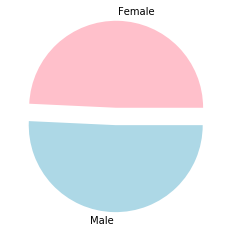

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sexes, labels=["Female","Male"], explode=[.1,.1], colors=['pink','lightblue'])
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = unique_mice.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_by_timepoint = pd.merge(last_timepoint, unique_mice, on=["Mouse ID", "Timepoint"], how='left')
merged_by_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_by_timepoint["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


#     # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_vol = merged_by_timepoint.loc[merged_by_timepoint["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


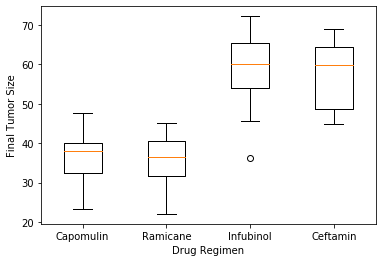

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol,labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Size')
plt.show()

## Line and Scatter Plots

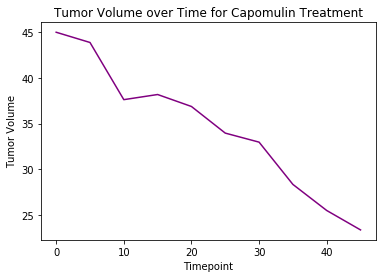

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Created a table of only mice that were treated with Capomulin
capomulin_only = unique_mice.loc[unique_mice["Drug Regimen"] == "Capomulin"]

# printed table to check work, and selected a mouse to track
# capomulin_only

# Created a new table for only the mouse I wanted to track
capomulin_mouse = capomulin_only.loc[capomulin_only["Mouse ID"] == "s185"]
# Printed a table to check my work
# capomulin_mouse

# Setting x and y axis values to the columns of my new table
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]
# Update labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over Time for Capomulin Treatment")
# Plot the line
plt.plot(x_axis, y_axis, color="purple")


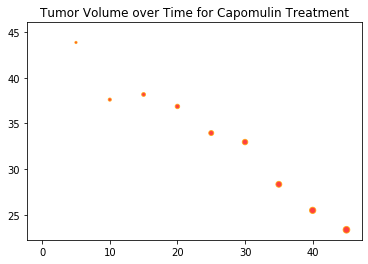

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="orange",
            s=x_axis, alpha=0.75)

## Correlation and Regression

The correlation coefficient between Capomulin treatment and tumor size in mice is -0.98


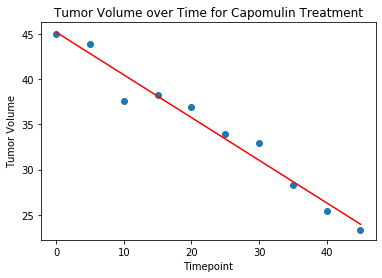

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



# Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over Time for Capomulin Treatment")
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")


# correlation
print(f"The correlation coefficient between Capomulin treatment and tumor size in mice is {round(st.pearsonr(x_axis,y_axis)[0],2)}") 
